In [12]:
# 使用するモデルのインポート
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor


In [43]:
# その他のモジュールのインポート
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_predict, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform, randint, expon
import random

In [14]:
# ファイルの読み込み、データの格納・欠損値処理・確認
# file_path = "C:/Users/thisi/OneDrive/共有ファイル/リモートデスクトップ/ビニング処理_卒研A.csv"
# file_path = "E:/実験/実験結果/卒研B/データセット/2. 不要特徴量削除/2.不要特徴量削除後 分類テスト.csv"
# file_path = "C:/Users/81806/OneDrive/共有ファイル/リモートデスクトップ/データセット/2. 不要特徴量削除/2.不要特徴量削除後 分類テスト.csv"
file_path =  "C:/Users/thisi/OneDrive/共有ファイル/リモートデスクトップ/vif_result.csv"
target_column = "SD_con"
data = pd.read_csv(file_path)
data = data.drop(columns=["SD_dis", "Minimum_duration_of_whole_fixations", "Duration_of_first_Visit", "First-pass_first_fixation_duration"])
data = data.fillna(data.mean())
data.info()
X = data.drop(columns=[target_column])
y = data[target_column]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 54 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   SD_con                                                   538 non-null    float64
 1   Interest                                                 538 non-null    float64
 2   readers'_vocabulary                                      538 non-null    float64
 3   Average_duration_of_fixations                            538 non-null    float64
 4   Minimum_duration_of_fixations                            538 non-null    float64
 5   Maximum_duration_of_fixations                            538 non-null    float64
 6   Duration_of_first_fixation                               538 non-null    float64
 7   Average_pupil_diameter                                   538 non-null    float64
 8   Average_duration_of_Visit_per_

In [21]:
data.head()

,SD_con,Interest,readers'_vocabulary,Average_duration_of_fixations,Minimum_duration_of_fixations,Maximum_duration_of_fixations,Duration_of_first_fixation,Average_pupil_diameter,Average_duration_of_Visit_per_characters,Minimum_duration_of_Visit,...,Percentage_of_Chinese_words_verb,Percentage_of_Chinese_words_noun,Average_length_of_compund_nouns,Number_of_characters_of_adnominal_modification,Percentage_of_adnominal_modification_out_of_total_nouns,Number_of_adnominal_modification_out_of_total_nouns,Percentage_of_frequent_words,Cossim_model6,Norm_model6,Avecossim_model6
0,-0.815427,0.375212,0.761595,-0.351952,-0.097800,0.199184,-0.600746,-1.170699,-0.295523,0.754565,...,-0.100555,0.959721,0.896480,0.350212,1.053415,2.269788,1.304719,0.695937,0.224689,0.071816
1,1.153660,0.375212,0.761595,-0.185476,0.239483,-0.567183,-0.658071,-0.462425,0.888256,-0.507392,...,3.798454,1.083235,0.695224,-0.551506,-0.276486,-0.660962,-0.723448,0.446496,-0.891166,1.271223
2,-0.772722,0.375212,0.761595,0.169674,-0.586860,0.187096,0.187480,-0.441221,-0.301747,-0.459777,...,3.798454,0.877378,1.097736,0.214954,-0.276486,0.315954,0.049187,0.880200,0.729960,0.635161
3,-0.778092,0.375212,0.761595,-0.129983,-0.536267,0.182261,0.366622,-0.534291,-0.470714,-0.460434,...,2.336325,0.300979,0.828053,2.063475,-1.074427,-0.660962,0.338925,-0.031617,0.512859,-0.094689
4,-0.858132,0.375212,0.761595,-0.474034,-0.215849,-0.424547,-0.536254,-0.199843,-0.261558,-0.377026,...,0.829890,1.042064,0.695224,0.755984,-1.074427,-0.660962,-0.337130,0.431441,-0.138019,0.905471


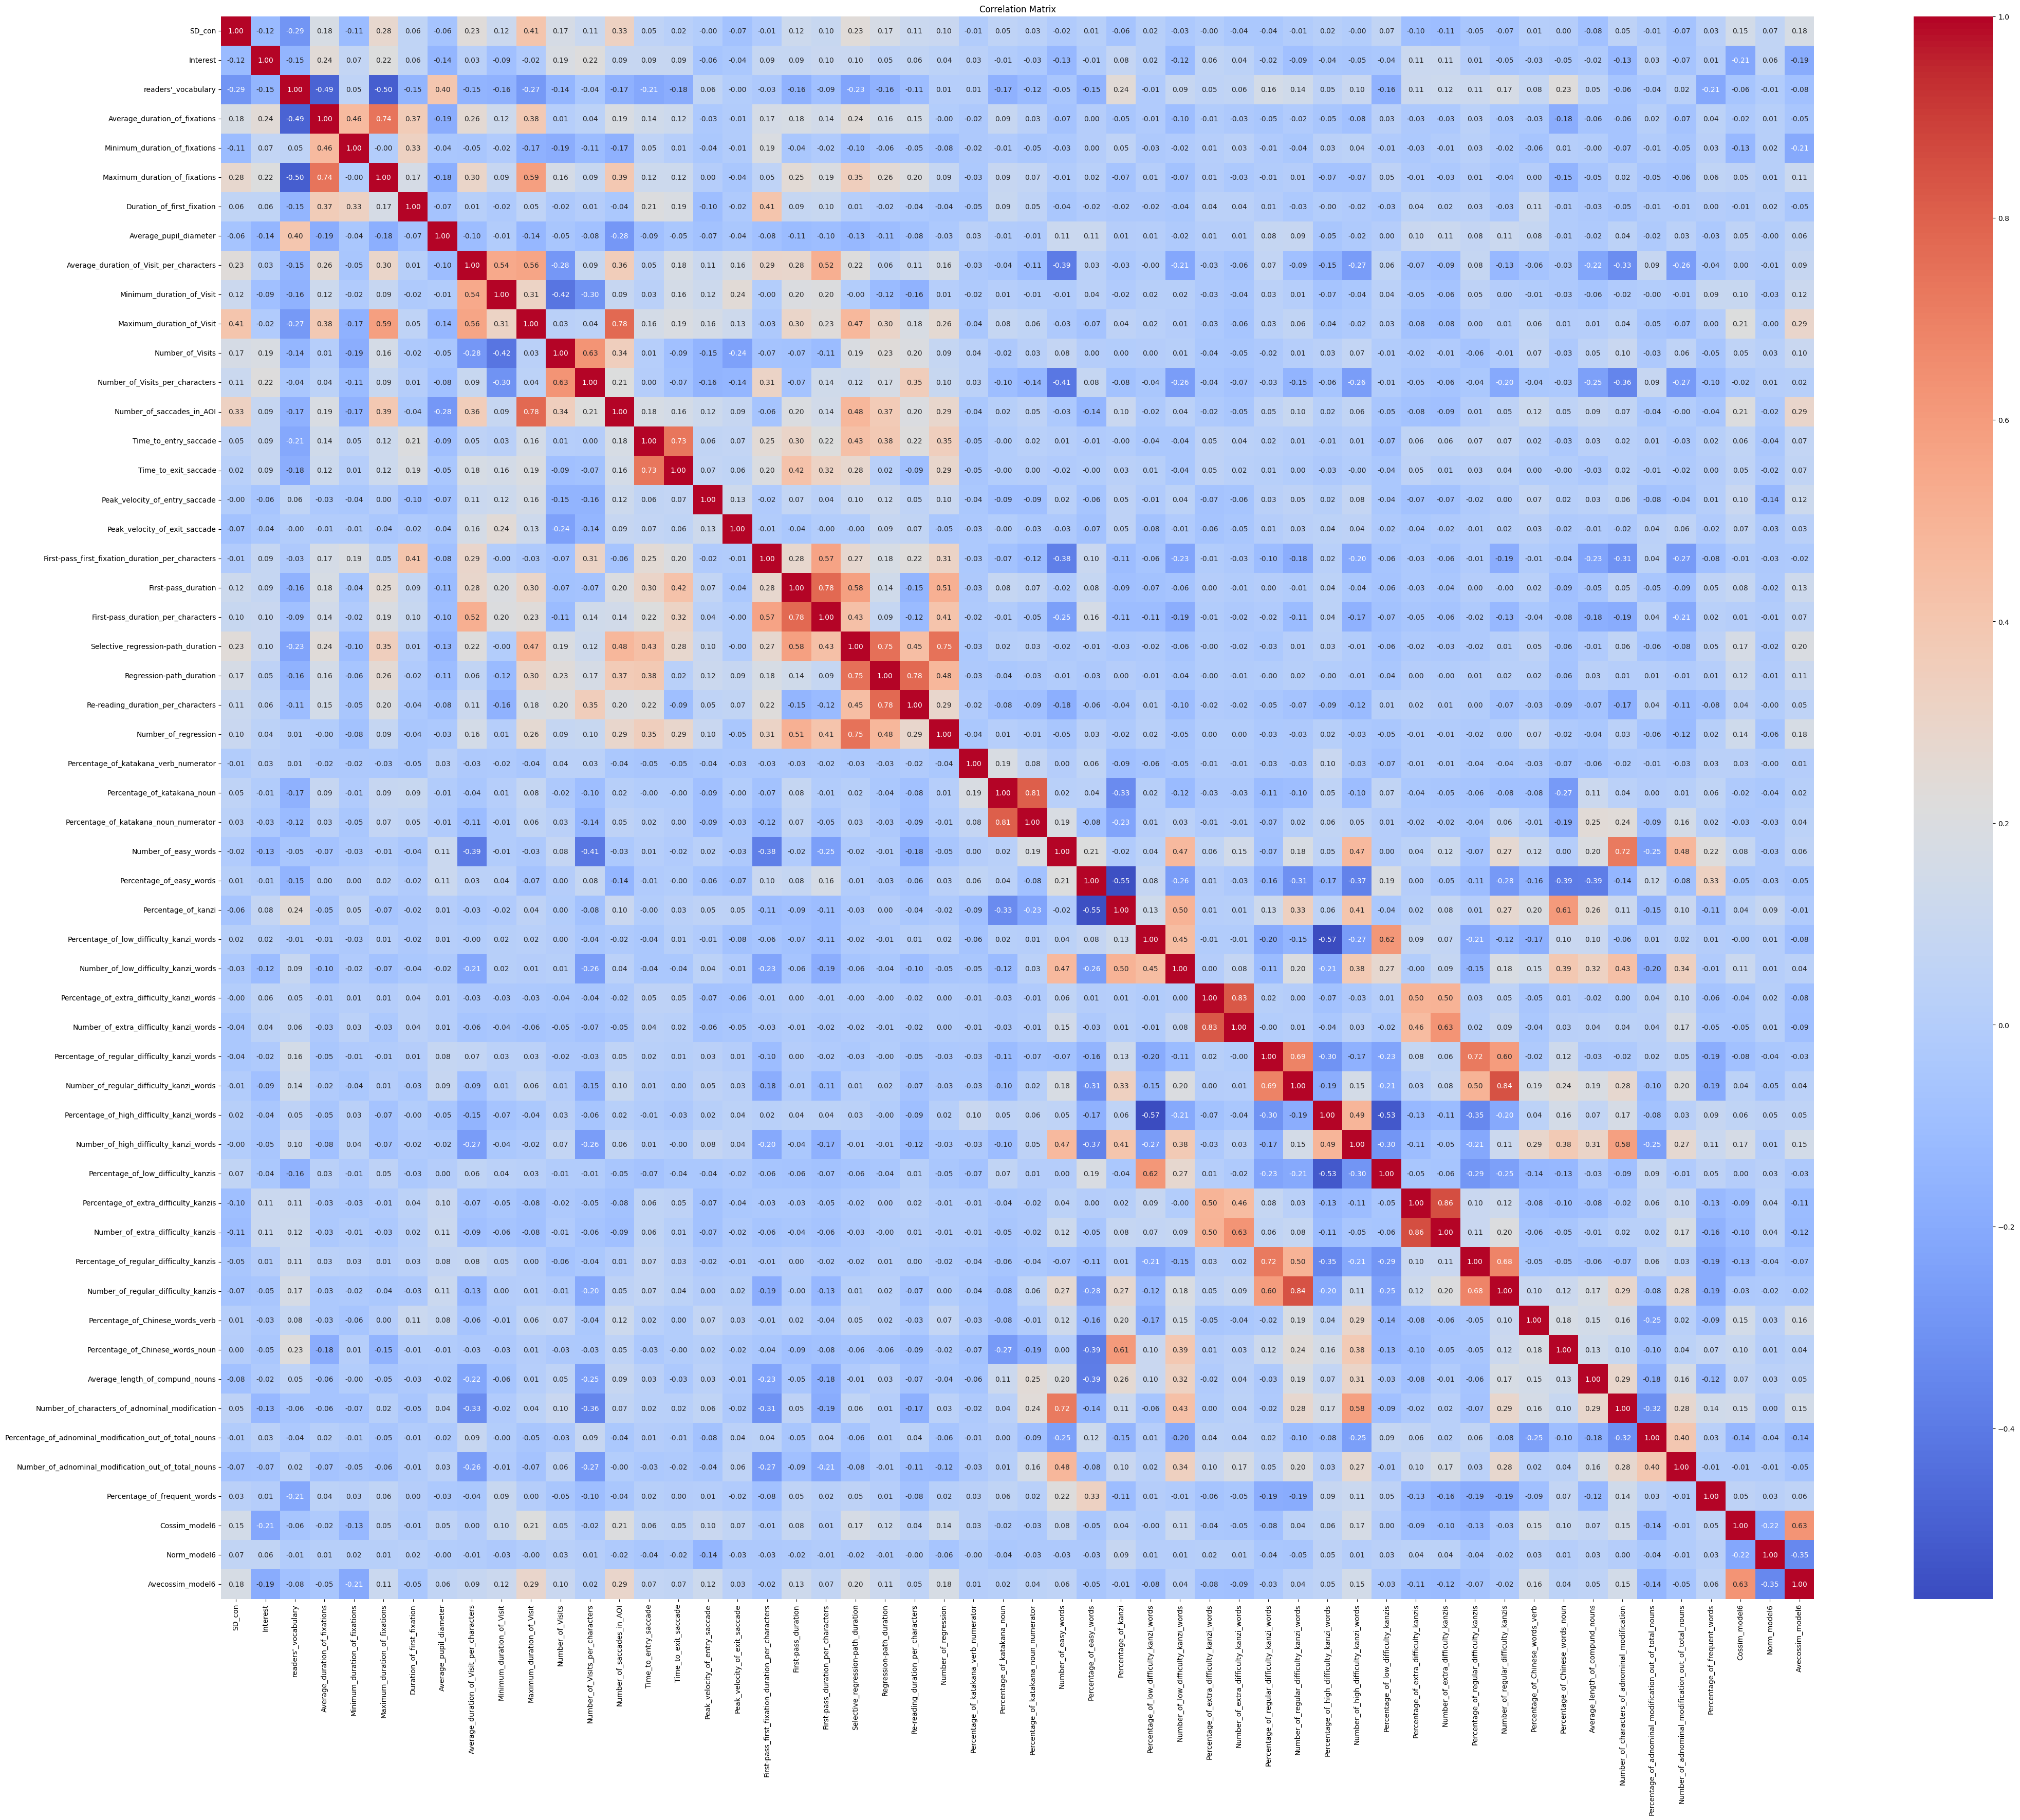

In [15]:
# データの可視化
plt.figure(figsize=(50, 40))
corr_matrix = data.corr('pearson')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# # データの可視化
# plt.figure(figsize=(50, 40))
# corr_matrix = data.corr('spearman')
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title("Correlation Matrix")
# plt.show()

# # 散布図行列は時間かかるのでやりたいときだけ
# sns.pairplot(data)
# plt.title("Scatter Plot Matrix")
# plt.show()

In [24]:
# 特徴量選択
sfs = SFS(GradientBoostingRegressor(),
          k_features="best",
          forward = False,
          floating= True,
          scoring = 'r2',
          cv = 3,
          n_jobs= -1)

sfs = sfs.fit(X, y)


# 選択された特徴量の表示
selected_features = sfs.k_feature_names_
selected_features

("readers'_vocabulary",
 'Maximum_duration_of_fixations',
 'Minimum_duration_of_Visit',
 'Maximum_duration_of_Visit',
 'Number_of_Visits',
 'Time_to_entry_saccade',
 'Time_to_exit_saccade',
 'Peak_velocity_of_entry_saccade',
 'Average_length_of_compund_nouns',
 'Percentage_of_frequent_words',
 'Cossim_model6',
 'Norm_model6',
 'Avecossim_model6')

In [25]:
# specific_feature = ['Maximum_duration_of_Visit',
#  'Peak_velocity_of_entry_saccade',
#  'First-pass_first_fixation_duration_per_characters',
#  'Percentage_of_katakana_noun',
#  'Percentage_of_extra_difficulty_kanzi_words',
#  'Number_of_regular_difficulty_kanzi_words',
#  'Number_of_extra_difficulty_kanzis',
#  'Cossim_model6']

# sfs_model = "None"

# type(specific_feature)

In [26]:
# selected_features = X.columns
# sfs = "None"
# selected_features = specific_feature

# 選択された特徴量のみをXに指定
X_slected = X[list(selected_features)]
X_slected.head()

,readers'_vocabulary,Maximum_duration_of_fixations,Minimum_duration_of_Visit,Maximum_duration_of_Visit,Number_of_Visits,Time_to_entry_saccade,Time_to_exit_saccade,Peak_velocity_of_entry_saccade,Average_length_of_compund_nouns,Percentage_of_frequent_words,Cossim_model6,Norm_model6,Avecossim_model6
0,0.761595,0.199184,0.754565,-0.343989,-0.908840,-1.150092,-0.949985,-1.083079,0.896480,1.304719,0.695937,0.224689,0.071816
1,0.761595,-0.567183,-0.507392,1.100091,-0.471491,-1.159635,-1.169610,-0.489110,0.695224,-0.723448,0.446496,-0.891166,1.271223
2,0.761595,0.187096,-0.459777,0.027721,-0.034142,-0.320546,-0.320684,1.501812,1.097736,0.049187,0.880200,0.729960,0.635161
3,0.761595,0.182261,-0.460434,0.919100,0.403206,0.075486,-1.178702,1.841484,0.828053,0.338925,-0.031617,0.512859,-0.094689
4,0.761595,-0.424547,-0.377026,0.005775,-0.034142,0.628287,0.557161,1.887223,0.695224,-0.337130,0.431441,-0.138019,0.905471


In [31]:
# 選択された特徴量でモデル構築
X_train, X_test, y_train, y_test = train_test_split(X_slected, y, test_size=0.2, random_state=42, shuffle=True)

# 標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:

# モデルの構築
base_models = [
        ('line', LinearRegression()),
        ('rf', RandomForestRegressor(random_state=42)),
        ('gb', GradientBoostingRegressor()),
        ('svr', SVR(kernel='rbf')),
        ('knn', KNeighborsRegressor()),
        ('mlp', MLPRegressor(random_state=42)),
    ]

param_dist = {
    'rf__n_estimators': randint(50, 150),
    'rf__max_depth': randint(5, 50),
    'rf__min_samples_split': randint(1, 3),
    'rf__min_samples_leaf': uniform(0.01, 1),
    'gb__n_estimators':randint(80, 200),
    'gb__learning_rate': uniform(0.01, 0.3),
    'gb__max_depth':randint(3, 10),
    'gb__min_samples_leaf':randint(1, 5),
    'gb__subsample':uniform(0.5, 1.0),
    'svr__C': uniform(0.01, 100),
    'svr__epsilon': uniform(0.01, 1),
    'svr__gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'knn__n_neighbors':randint(2, 7),
    'mlp__hidden_layer_sizes': [(100,), (50,), (100, 50)],
    'mlp__alpha': uniform(0.0001, 0.01),
    'mlp__max_iter': randint(100, 300),
}

meta_model = LinearRegression()

stacking_model = StackingRegressor(estimators=base_models,
                                     final_estimator=meta_model,
                                       cv=5)


In [46]:
# ランダムサーチの実行
random_search = RandomizedSearchCV(estimator=stacking_model,
                                   param_distributions=param_dist,
                                   n_iter=100,
                                   cv=3,
                                   scoring='r2',
                                   random_state=42)

random_search.fit(X_train_scaled, y_train)
print(random_search.best_params_)

c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (188) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (188) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (188) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (188) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_netw

{'gb__learning_rate': 0.21490203202490707, 'gb__max_depth': 3, 'gb__min_samples_leaf': 2, 'gb__n_estimators': 87, 'gb__subsample': 0.885396620965565, 'knn__n_neighbors': 3, 'mlp__alpha': 0.0003327193573582587, 'mlp__hidden_layer_sizes': (50,), 'mlp__max_iter': 214, 'rf__max_depth': 45, 'rf__min_samples_leaf': 0.5060374542934062, 'rf__min_samples_split': 2, 'rf__n_estimators': 124, 'svr__C': 87.7572013527053, 'svr__epsilon': 0.7450710438038858, 'svr__gamma': 1}


c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (214) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (214) reached and the optimization hasn't converged yet.
  warnings.warn(


In [47]:
# 最終モデルの構築
final_model = random_search.best_estimator_
final_model.fit(X_train_scaled, y_train)

c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (214) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (214) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (214) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (214) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_netw

StackingRegressor(cv=5,
                  estimators=[('line', LinearRegression()),
                              ('rf',
                               RandomForestRegressor(max_depth=45,
                                                     min_samples_leaf=0.5060374542934062,
                                                     n_estimators=124,
                                                     random_state=42)),
                              ('gb',
                               GradientBoostingRegressor(learning_rate=0.21490203202490707,
                                                         min_samples_leaf=2,
                                                         n_estimators=87,
                                                         subsample=0.885396620965565)),
                              ('svr',
                               SVR(C=87.7572013527053,
                                   epsilon=0.7450710438038858, gamma=1)),
                              ('knn', KNeighborsRegressor(n_neighbors=3)),
                              ('mlp',
                               MLPRegressor(alpha=0.0003327193573582587,
                                            hidden_layer_sizes=(50,),
                                            max_iter=214, random_state=42))],
                  final_estimator=LinearRegression())

In [48]:
# 最終モデルのテストデータへの適用および性能評価
y_pred = final_model.predict(X_test_scaled)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2", r2_score(y_test, y_pred))
# print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
# disp.plot(cmap='Blues')
# plt.show()

MAE: 0.7157241694301776
MSE: 0.7415754197662481
R2 0.21477292104234247


In [49]:
# Compare base models
Model_accuracy = {}
for name, model in random_search.best_estimator_.estimators:
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    Model_accuracy[f"{name}"] = scores.mean()
    print(f"{name} Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")

# Evaluate stacking model
stacking_scores = cross_val_score(final_model, X, y, cv=5, scoring='r2')
print(f"Stacking Model Accuracy: {stacking_scores.mean():.4f} (+/- {stacking_scores.std():.4f})")

line Accuracy: -0.3206 (+/- 0.2569)
rf Accuracy: -0.2649 (+/- 0.1980)
gb Accuracy: -0.3852 (+/- 0.3029)
svr Accuracy: -0.3834 (+/- 0.4045)
knn Accuracy: -0.3965 (+/- 0.1828)


c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (214) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (214) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (214) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (214) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_netw

mlp Accuracy: -1.0474 (+/- 0.3253)


c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (214) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (214) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (214) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (214) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_netw

Stacking Model Accuracy: -0.2308 (+/- 0.1875)


c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (214) reached and the optimization hasn't converged yet.
  warnings.warn(


In [50]:
# 各モデルの特徴量重要度をPFIとSHAPで算出
from sklearn.inspection import permutation_importance
import shap

# 訓練データ(X_train, y_train)を用いてモデルをフィットします
for name, model in random_search.best_estimator_.estimators:
    model.fit(X_train, y_train)

PFIs = {}
for name, model in random_search.best_estimator_.estimators:
    pfi = permutation_importance(model, X_train, y_train, random_state=42)
    # 特徴量の名前と重要度をセットにした辞書を作成
    feature_importances = {X_train.columns[i]: pfi.importances_mean[i] for i in range(len(X_train.columns))}
    PFIs[f'{name}'] = feature_importances

# 結果の確認
for model_name, importances in PFIs.items():
    print(f"Model: {model_name}")
    for feature, importance in importances.items():
        print(f"  {feature}: {importance:.4f}")


# SHAPs = {}
# for name, model in random_search.best_estimator_.estimators:
#     explainer = shap.KernelExplainer(model.predict_proba, X_train_scaled)
#     shap_values = explainer.shap_values(X_train_scaled)
#     shap_importances = np.mean(shap_values, axis=(0, 2))
#     shaps = {X_train.columns[i]: shap_importances[i] for i in range(len(X_train.columns))}
#     # SHAPs[f'{name}'] = np.mean(shap_values, axis=(0, 2))
#     shap.summary_plot(np.mean(shap_values, axis=2), X_train_scaled, feature_names=selected_features)
#     SHAPs[f'{name}'] = shaps

# # 結果を表示
# for model_name, importances in SHAPs.items():
#     print(f"Model {model_name}")
#     for feature, importance in importances.items():
#         print(f"  {feature}: {importance}")




c:\WorkSpace\Practice\env3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\WorkSpace\Practice\env3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (214) reached and the optimization hasn't converged yet.
  warnings.warn(


Model: line
  readers'_vocabulary: 0.0841
  Maximum_duration_of_fixations: 0.0130
  Minimum_duration_of_Visit: 0.0038
  Maximum_duration_of_Visit: 0.2632
  Number_of_Visits: 0.0256
  Time_to_entry_saccade: 0.0375
  Time_to_exit_saccade: 0.0615
  Peak_velocity_of_entry_saccade: 0.0022
  Average_length_of_compund_nouns: 0.0212
  Percentage_of_frequent_words: 0.0005
  Cossim_model6: 0.0137
  Norm_model6: 0.0199
  Avecossim_model6: 0.0090
Model: rf
  readers'_vocabulary: 0.0000
  Maximum_duration_of_fixations: 0.0000
  Minimum_duration_of_Visit: 0.0000
  Maximum_duration_of_Visit: 0.0000
  Number_of_Visits: 0.0000
  Time_to_entry_saccade: 0.0000
  Time_to_exit_saccade: 0.0000
  Peak_velocity_of_entry_saccade: 0.0000
  Average_length_of_compund_nouns: 0.0000
  Percentage_of_frequent_words: 0.0000
  Cossim_model6: 0.0000
  Norm_model6: 0.0000
  Avecossim_model6: 0.0000
Model: gb
  readers'_vocabulary: 0.1330
  Maximum_duration_of_fixations: 0.1094
  Minimum_duration_of_Visit: 0.0741
  Maximu

In [51]:
""" # グラフプロット用の関数
def plot_feature_importance(Model):
    for model_name, features in Model.items():
        plt.figure(figsize=(10, 6))
        names, values = zip(*sorted(features.items(), key=lambda x: x[1], reverse=True))
        plt.barh(names, values, color='skyblue')
        plt.title(f"Feature Importance for Model: {model_name}")
        plt.xlabel("Permutation Importance")
        plt.ylabel("Features")
        plt.tight_layout()
        plt.show()

# グラフ描画
plot_feature_importance(PFIs) """


' # グラフプロット用の関数\ndef plot_feature_importance(Model):\n    for model_name, features in Model.items():\n        plt.figure(figsize=(10, 6))\n        names, values = zip(*sorted(features.items(), key=lambda x: x[1], reverse=True))\n        plt.barh(names, values, color=\'skyblue\')\n        plt.title(f"Feature Importance for Model: {model_name}")\n        plt.xlabel("Permutation Importance")\n        plt.ylabel("Features")\n        plt.tight_layout()\n        plt.show()\n\n# グラフ描画\nplot_feature_importance(PFIs) '

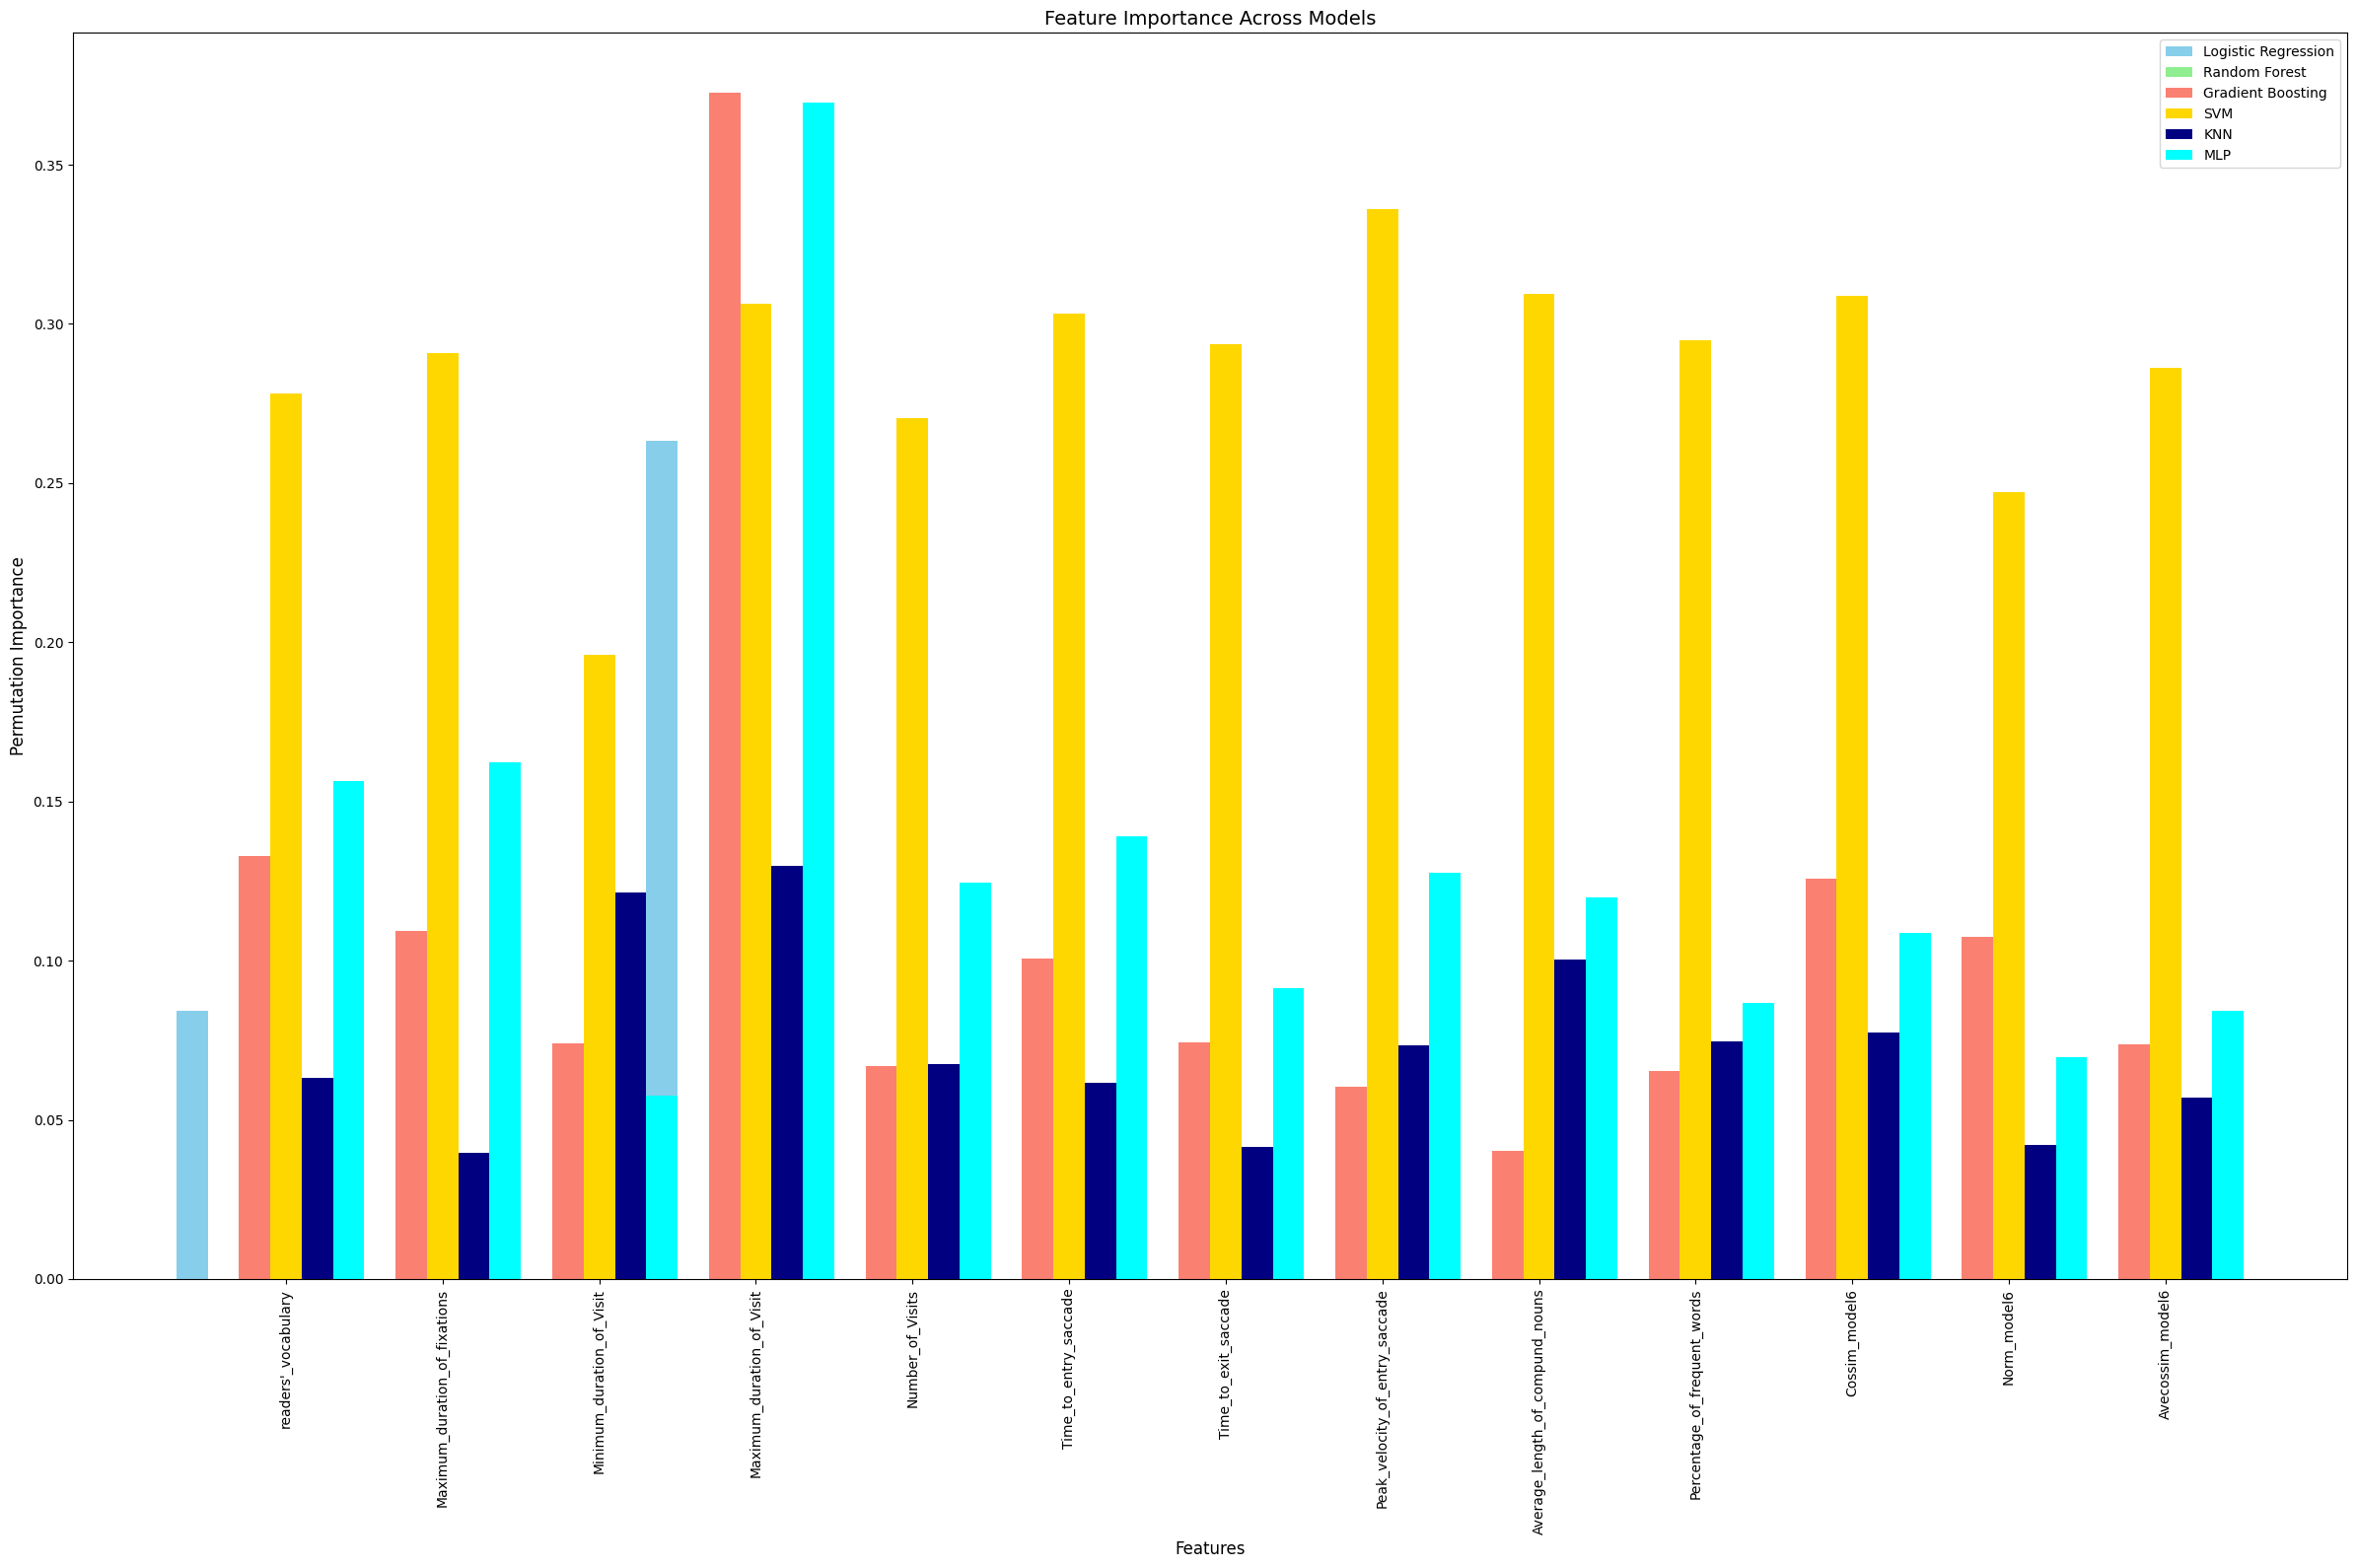

In [54]:
# 各モデルのデータを取得し、共通する特徴量リストを取得
features = list(PFIs["line"].keys())
importance_line = [PFIs["line"].get(f, 0) for f in features]
importance_rf = [PFIs["rf"].get(f, 0) for f in features]
importance_gb = [PFIs["gb"].get(f, 0) for f in features]
importance_svr = [PFIs["svr"].get(f, 0) for f in features]
importance_knn = [PFIs["knn"].get(f, 0) for f in features]
importance_mlp = [PFIs["mlp"].get(f, 0) for f in features]

# グラフ描画
x = np.arange(len(features))  # 各特徴量の位置
width = 0.2  # バーの幅

fig, ax = plt.subplots(figsize=(12*2, 8*2))

# 各モデルの棒グラフをプロット
ax.bar(x - 3*width, importance_line, width, label='Logistic Regression', color='skyblue')
ax.bar(x - 2*width, importance_rf, width, label='Random Forest', color='lightgreen')
ax.bar(x - width, importance_gb, width, label='Gradient Boosting', color='salmon')
ax.bar(x, importance_svr, width, label='SVM', color='gold')
ax.bar(x + width, importance_knn, width, label='KNN', color='navy')
ax.bar(x + 2*width, importance_mlp, width, label='MLP', color='aqua')

# 軸ラベルや目盛設定
ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('Permutation Importance', fontsize=12)
ax.set_title('Feature Importance Across Models', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(features, rotation=90, fontsize=10)
ax.legend()

plt.tight_layout()
plt.show()

In [20]:
# # 結果の記録
# basemodel_names = [name for name, _ in base_models]

# import datetime
# currenttime = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

# """ Accuracy = accuracy_score(y_test, y_pred)
# Precision = precision_score(y_test, y_pred, average='weighted')
# Recall = recall_score(y_test, y_pred, average='weighted')
# F1_Score = f1_score(y_test, y_pred, average='weighted') """

# model_list = random_search.best_estimator_.estimators
# Models = {}
# for name, _ in model_list:
#     Models[f"{name}"] = f"{name}"



# result = {'Original Data shape': [X.shape],
#             'sfs_model' : [sfs_model],
#             'Models': [basemodel_names],
#             'Best number of features': len(sfs.k_feature_idx_),
#             'Slected Features': [selected_features],
#             'Model Params':[random_search.best_params_],
#             'Accuracy': accuracy_score(y_test, y_pred),
#             'Precision': precision_score(y_test, y_pred, average='weighted'),
#             'Recall': recall_score(y_test, y_pred, average='weighted'),
#             'F1_Score' : f1_score(y_test, y_pred, average='weighted'),
#             'Date': currenttime,
#             'Dataset' : file_path
#             }

# save_importances = {
#                     'model' : Models,
#                     'PFI' : PFIs,
#                     # 'SHAP' : SHAPs,
#                     'Date': currenttime
#                     }

# new_result = pd.DataFrame(result)
# new_result.to_csv('C:/WorkSpace/Practice/卒研B/result2.csv',
#                   mode='a',
#                   header=False,
#                   index=False)

# new_importances = pd.DataFrame(save_importances)
# new_importances.to_csv('C:/WorkSpace/Practice/卒研B/importances.csv',
#                   mode='a',
#                   header=True,
#                   index=False)

In [ ]:
# 結果の記録
basemodel_names = [name for name, _ in base_models]

import datetime
currenttime = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

""" Accuracy = accuracy_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred, average='weighted')
Recall = recall_score(y_test, y_pred, average='weighted')
F1_Score = f1_score(y_test, y_pred, average='weighted') """

model_list = random_search.best_estimator_.estimators
Models = {}
for name, _ in model_list:
    Models[f"{name}"] = f"{name}"



result = {'Original Data shape': [X.shape],
            'sfs' : sfs,
            'Models': [basemodel_names],
            'Best number of features': len(selected_features),
            'Slected Features': [selected_features],
            'Model Params':[random_search.best_params_],
            'Model Accuravy':[Model_accuracy],
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, average='weighted'),
            'Recall': recall_score(y_test, y_pred, average='weighted'),
            'F1_Score' : f1_score(y_test, y_pred, average='weighted'),
            'Date': currenttime,
            'Dataset' : file_path
            }

save_importances = {
                    'model' : Models,
                    'PFI' : PFIs,
                    # 'SHAP' : SHAPs,
                    'Date': currenttime
                    }

new_result = pd.DataFrame(result)
new_result.to_csv('C:/WorkSpace/Practice/卒研B/result4.csv',
                  mode='a',
                  header=False,
                  index=False)

new_importances = pd.DataFrame(save_importances)
new_importances.to_csv('C:/WorkSpace/Practice/卒研B/importances4.csv',
                  mode='a',
                  header=True,
                  index=False)

In [626]:
random_search.best_estimator_.estimators

[('log', LogisticRegression(C=2, max_iter=59, random_state=42)),
 ('rf',
  RandomForestClassifier(criterion='log_loss', max_depth=18,
                         min_samples_leaf=0.14919802461752985, n_estimators=103,
                         random_state=42)),
 ('gb',
  GradientBoostingClassifier(learning_rate=0.13089405362954842, max_depth=4,
                             min_samples_leaf=3, n_estimators=81, random_state=42,
                             subsample=0.7236144344963112)),
 ('svm',
  SVC(C=82.94324051412838, gamma=0.1, probability=True, random_state=42)),
 ('knn', KNeighborsClassifier(leaf_size=23)),
 ('mlp',
  MLPClassifier(alpha=0.0058516335049662496, max_iter=153, random_state=42)),
 ('nb', GaussianNB())]

In [627]:
import time
for i in range(5):
    print(i)
    time.sleep(1)
!rundll32 user32.dll,MessageBeep

0
1
2
3
4
